In [1]:
cog_key = '8e4be78986e14499a78711463e50b9b4' 
cog_endpoint = 'https://mycongnitiveservices123.cognitiveservices.azure.com/' 

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://mycongnitiveservices123.cognitiveservices.azure.com/ using key 8e4be78986e14499a78711463e50b9b4


In [2]:
pip install azure.cognitiveservices.vision.face

Note: you may need to restart the kernel to use updated packages.


'c:\users\dell' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import os

In [4]:
os.getcwd()

'D:\\mmmut\\ML_Session'

In [5]:
os.chdir('D:\mmmut\ML_Session\My Photos')

In [6]:
os.getcwd()

'D:\\mmmut\\ML_Session\\My Photos'

In [7]:
os.listdir()

['IMG-20200311-WA0000.jpg',
 'IMG-20200317-WA0002.jpg',
 'IMG-20210102-WA0011.jpg',
 'IMG-20210102-WA0024.jpg',
 'IMG-20210206-WA0015.jpg',
 'IMG-20210206-WA0016.jpg',
 'IMG-20210206-WA0020.jpg',
 'IMG-20210206-WA0025.jpg',
 'IMG-20210206-WA0026.jpg',
 'IMG-20210206-WA0033.jpg',
 'IMG-20210206-WA0046.jpg',
 'IMG-20210206-WA0048.jpg',
 'IMG-20210206-WA0051.jpg',
 'IMG-20210206-WA0055.jpg',
 'IMG-20210206-WA0056 (1).jpg',
 'IMG-20210206-WA0056.jpg',
 'IMG-20210206-WA0057.jpg',
 'IMG-20210206-WA0061.jpg',
 'IMG-20210206-WA0062.jpg',
 'IMG-20210206-WA0069.jpg',
 'IMG-20210206-WA0070.jpg',
 'IMG-20210207-WA0054.jpg',
 'IMG-20210207-WA0074.jpg']

In [8]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
import faces 
import os
%matplotlib inline
face_client = FaceClient(cog_endpoint, CognitiveServicesCredentials(cog_key))


# Create a face detection client. face_client = FaceClient(cog_endpoint, CognitiveServicesCredentials(cog_key)) 
# Open an image image_path = os.path.join('data', 'face', 'store_cam2.jpg') image_stream = open(image_path, "rb") 
# Detect faces detected_faces = face_client.face.detect_with_stream(image=image_stream) 
# Display the faces (code in python_code/faces.py) faces.show_faces(image_path, detected_faces)

In [9]:
def show_face_attributes(image_path, detected_faces):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw

    # Open an image
    img = Image.open(image_path)

    # Create a figure to display the results
    fig = plt.figure(figsize=(8, 6))

    if detected_faces:
        # If there are faces, how many?
        num_faces = len(detected_faces)
        prediction = ' (' + str(num_faces) + ' faces detected)'
        # Draw a rectangle around each detected face
        for face in detected_faces:
            r = face.face_rectangle
            bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
            draw = ImageDraw.Draw(img)
            draw.rectangle(bounding_box, outline='magenta', width=5)

            # Annotate with face attributes (only age and emotion are used in this sample)
            detected_attributes = face.face_attributes.as_dict()
            age = 'age unknown' if 'age' not in detected_attributes.keys() else int(detected_attributes['age'])
            annotations = 'Person aged approximately {}'.format(age)
            txt_lines = 1
            if 'emotion' in detected_attributes.keys():
                for emotion_name in detected_attributes['emotion']:
                    txt_lines += 1
                    annotations += '\n - {}: {}'.format(emotion_name, detected_attributes['emotion'][emotion_name])
            plt.annotate(annotations,((r.left + r.width), (r.top + r.height + (txt_lines * 12))), backgroundcolor='white')

        # Plot the image
        #a = fig.add_subplot(1,1,1)
        fig.suptitle(prediction)

    plt.axis('off')
    plt.imshow(img)


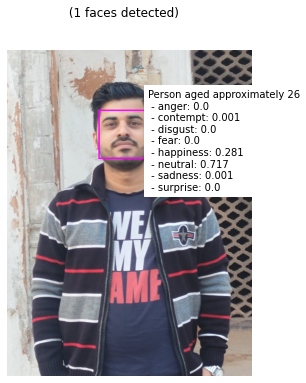

In [10]:
#Open an image
image_path = os.path.join('D:\\','mmmut','ML_Session','My Photos', 'IMG-20210102-WA0011.jpg') 
image_stream = open(image_path, "rb") 
#Detect faces and specified facial attributes 
attributes = ['age', 'emotion'] 
detected_faces = face_client.face.detect_with_stream(image=image_stream, return_face_attributes=attributes) 
print(detected_faces) 
#Display the faces and attributes (code in python_code/faces.py) 
show_face_attributes(image_path, detected_faces)

In [11]:
def show_similar_faces(image_1_path, image_1_face, image_2_path, image_2_faces, similar_faces):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw

    # Create a figure to display the results
    fig = plt.figure(figsize=(16, 6))

    # Show face 1
    img1 = Image.open(image_1_path)
    r = image_1_face.face_rectangle
    bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
    draw = ImageDraw.Draw(img1)
    draw.rectangle(bounding_box, outline='magenta', width=5)
    a = fig.add_subplot(1,2,1)
    plt.axis('off')
    plt.imshow(img1)

    # get the matching face IDs
    matching_face_ids = list(map(lambda face: face.face_id, similar_faces))

    # Draw a rectangle around each similar face in image 2
    img2 = Image.open(image_2_path)
    a = fig.add_subplot(1,2,2)
    plt.axis('off')
    for face in image_2_faces:
        r = face.face_rectangle
        bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
        draw = ImageDraw.Draw(img2)
        if face.face_id in matching_face_ids:
            draw.rectangle(bounding_box, outline='lightgreen', width=10)
            plt.annotate('Match!',(r.left, r.top + r.height + 15), backgroundcolor='white')
        else:
            draw.rectangle(bounding_box, outline='red', width=5)
    plt.imshow(img2)
    plt.show()

image_2_face_ids----> ['462d4d6c-0079-4982-802c-cf59851d6cef', '1b3ee631-0384-42cc-9b61-f97f5fd09473', 'e26e955f-e0a7-4af8-8f3d-9628c35d38f9']
face_1----> {'additional_properties': {}, 'face_id': 'e9fd3a75-eea1-4e58-81ca-5566287674ca', 'recognition_model': None, 'face_rectangle': <azure.cognitiveservices.vision.face.models._models_py3.FaceRectangle object at 0x0000025A55B58E50>, 'face_landmarks': None, 'face_attributes': None}


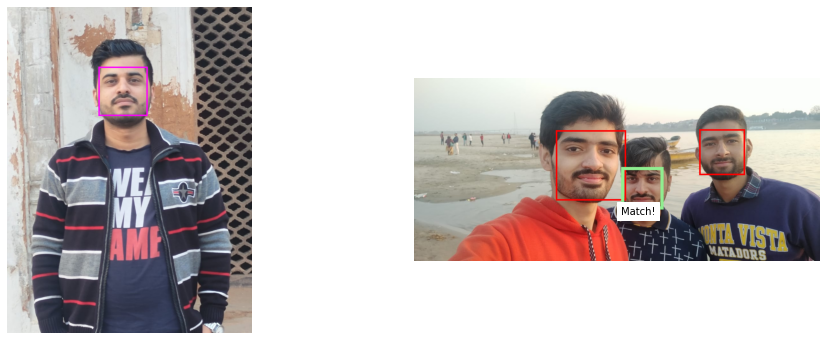

In [12]:
# Get the ID of the first face in image 1 
image_1_path = os.path.join( 'D:\\','mmmut','ML_Session','My Photos' ,'IMG-20210102-WA0011.jpg') 
image_1_stream = open(image_1_path, "rb") 
image_1_faces = face_client.face.detect_with_stream(image=image_1_stream) 
face_1 = image_1_faces[0] 
# Get the face IDs in a second image 
#image_2_path = os.path.join('data', 'face', 'store_cam2.jpg')
image_2_path = os.path.join( 'D:\\','mmmut','ML_Session','My Photos' ,'IMG-20210206-WA0020.jpg') 
image_2_stream = open(image_2_path, "rb") 
image_2_faces = face_client.face.detect_with_stream(image=image_2_stream) 
image_2_face_ids = list(map(lambda face: face.face_id, image_2_faces)); 
print("image_2_face_ids---->",image_2_face_ids) 
print("face_1---->", face_1) 
# Find faces in image 2 that are similar to the one in image 1 
similar_faces = face_client.face.find_similar(face_id=face_1.face_id, face_ids=image_2_face_ids) 
# Show the face in image 1, and similar faces in image 2(code in python_code/face.py) 
show_similar_faces(image_1_path, face_1, image_2_path, image_2_faces, similar_faces);

In [13]:
cog_key = '8e4be78986e14499a78711463e50b9b4' 
cog_endpoint = 'https://mycongnitiveservices123.cognitiveservices.azure.com/' 

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://mycongnitiveservices123.cognitiveservices.azure.com/ using key 8e4be78986e14499a78711463e50b9b4


In [14]:
pip install azure.cognitiveservices.vision.face

Note: you may need to restart the kernel to use updated packages.


'c:\users\dell' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
os.listdir()

['IMG-20200311-WA0000.jpg',
 'IMG-20200317-WA0002.jpg',
 'IMG-20210102-WA0011.jpg',
 'IMG-20210102-WA0024.jpg',
 'IMG-20210206-WA0015.jpg',
 'IMG-20210206-WA0016.jpg',
 'IMG-20210206-WA0020.jpg',
 'IMG-20210206-WA0025.jpg',
 'IMG-20210206-WA0026.jpg',
 'IMG-20210206-WA0033.jpg',
 'IMG-20210206-WA0046.jpg',
 'IMG-20210206-WA0048.jpg',
 'IMG-20210206-WA0051.jpg',
 'IMG-20210206-WA0055.jpg',
 'IMG-20210206-WA0056 (1).jpg',
 'IMG-20210206-WA0056.jpg',
 'IMG-20210206-WA0057.jpg',
 'IMG-20210206-WA0061.jpg',
 'IMG-20210206-WA0062.jpg',
 'IMG-20210206-WA0069.jpg',
 'IMG-20210206-WA0070.jpg',
 'IMG-20210207-WA0054.jpg',
 'IMG-20210207-WA0074.jpg']

In [16]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
import faces 
import os
%matplotlib inline
face_client = FaceClient(cog_endpoint, CognitiveServicesCredentials(cog_key))


# Create a face detection client. face_client = FaceClient(cog_endpoint, CognitiveServicesCredentials(cog_key)) 
# Open an image image_path = os.path.join('data', 'face', 'store_cam2.jpg') image_stream = open(image_path, "rb") 
# Detect faces detected_faces = face_client.face.detect_with_stream(image=image_stream) 
# Display the faces (code in python_code/faces.py) faces.show_faces(image_path, detected_faces)

In [17]:
def show_face_attributes(image_path, detected_faces):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw

    # Open an image
    img = Image.open(image_path)

    # Create a figure to display the results
    fig = plt.figure(figsize=(8, 6))

    if detected_faces:
        # If there are faces, how many?
        num_faces = len(detected_faces)
        prediction = ' (' + str(num_faces) + ' faces detected)'
        # Draw a rectangle around each detected face
        for face in detected_faces:
            r = face.face_rectangle
            bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
            draw = ImageDraw.Draw(img)
            draw.rectangle(bounding_box, outline='magenta', width=5)

            # Annotate with face attributes (only age and emotion are used in this sample)
            detected_attributes = face.face_attributes.as_dict()
            age = 'age unknown' if 'age' not in detected_attributes.keys() else int(detected_attributes['age'])
            annotations = 'Person aged approximately {}'.format(age)
            txt_lines = 1
            if 'emotion' in detected_attributes.keys():
                for emotion_name in detected_attributes['emotion']:
                    txt_lines += 1
                    annotations += '\n - {}: {}'.format(emotion_name, detected_attributes['emotion'][emotion_name])
            plt.annotate(annotations,((r.left + r.width), (r.top + r.height + (txt_lines * 12))), backgroundcolor='white')

        # Plot the image
        #a = fig.add_subplot(1,1,1)
        fig.suptitle(prediction)

    plt.axis('off')
    plt.imshow(img)


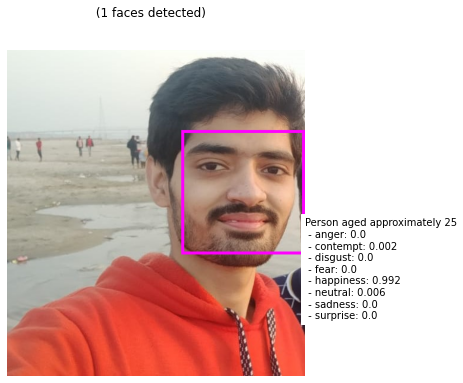

In [18]:
#Open an image
image_path = os.path.join('D:\\','mmmut','ML_Session','My Photos', 'IMG-20210206-WA0025.jpg') 
image_stream = open(image_path, "rb") 
#Detect faces and specified facial attributes 
attributes = ['age', 'emotion'] 
detected_faces = face_client.face.detect_with_stream(image=image_stream, return_face_attributes=attributes) 
print(detected_faces) 
#Display the faces and attributes (code in python_code/faces.py) 
show_face_attributes(image_path, detected_faces)

In [19]:
def show_similar_faces(image_1_path, image_1_face, image_2_path, image_2_faces, similar_faces):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw

    # Create a figure to display the results
    fig = plt.figure(figsize=(16, 6))

    # Show face 1
    img1 = Image.open(image_1_path)
    r = image_1_face.face_rectangle
    bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
    draw = ImageDraw.Draw(img1)
    draw.rectangle(bounding_box, outline='magenta', width=5)
    a = fig.add_subplot(1,2,1)
    plt.axis('off')
    plt.imshow(img1)

    # get the matching face IDs
    matching_face_ids = list(map(lambda face: face.face_id, similar_faces))

    # Draw a rectangle around each similar face in image 2
    img2 = Image.open(image_2_path)
    a = fig.add_subplot(1,2,2)
    plt.axis('off')
    for face in image_2_faces:
        r = face.face_rectangle
        bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
        draw = ImageDraw.Draw(img2)
        if face.face_id in matching_face_ids:
            draw.rectangle(bounding_box, outline='lightgreen', width=10)
            plt.annotate('Match!',(r.left, r.top + r.height + 15), backgroundcolor='white')
        else:
            draw.rectangle(bounding_box, outline='red', width=5)
    plt.imshow(img2)
    plt.show()

image_2_face_ids----> ['2bee707c-db87-41f6-bd44-83d7b5fd827a', 'dde1f217-7c66-4ca9-af86-1ff1b2428761']
face_1----> {'additional_properties': {}, 'face_id': '95126602-2a17-4ba2-8e91-b0b9a1fd9b5b', 'recognition_model': None, 'face_rectangle': <azure.cognitiveservices.vision.face.models._models_py3.FaceRectangle object at 0x0000025A55C548E0>, 'face_landmarks': None, 'face_attributes': None}


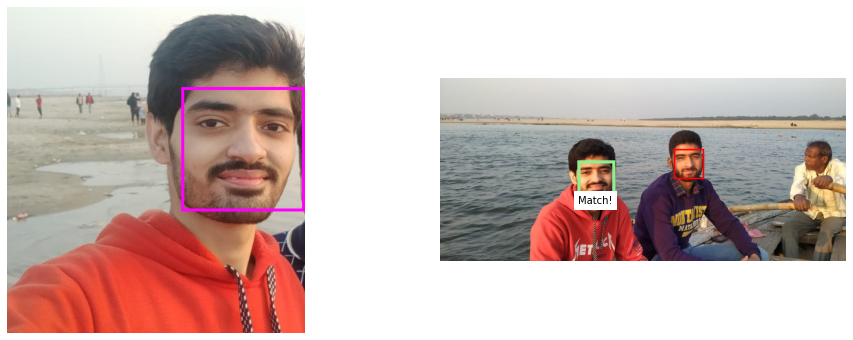

In [20]:
# Get the ID of the first face in image 1 
image_1_path = os.path.join( 'D:\\','mmmut','ML_Session','My Photos' ,'IMG-20210206-WA0025.jpg') 
image_1_stream = open(image_1_path, "rb") 
image_1_faces = face_client.face.detect_with_stream(image=image_1_stream) 
face_1 = image_1_faces[0] 
# Get the face IDs in a second image 
#image_2_path = os.path.join('data', 'face', 'store_cam2.jpg')
image_2_path = os.path.join( 'D:\\','mmmut','ML_Session','My Photos' ,'IMG-20210206-WA0056.jpg') 
image_2_stream = open(image_2_path, "rb") 
image_2_faces = face_client.face.detect_with_stream(image=image_2_stream) 
image_2_face_ids = list(map(lambda face: face.face_id, image_2_faces)); 
print("image_2_face_ids---->",image_2_face_ids) 
print("face_1---->", face_1) 
# Find faces in image 2 that are similar to the one in image 1 
similar_faces = face_client.face.find_similar(face_id=face_1.face_id, face_ids=image_2_face_ids) 
# Show the face in image 1, and similar faces in image 2(code in python_code/face.py) 
show_similar_faces(image_1_path, face_1, image_2_path, image_2_faces, similar_faces);